In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

Importing Dataset

In [3]:
#adding dataset to the file

jazz_dataset = pd.read_csv("audio_features_df.csv", index_col=False)


In [4]:

# to drop any rows that are not useful in our analysis

jazz_dataset.drop(jazz_dataset[jazz_dataset['year_released'] == 0].index, inplace = True)

#changing all songs from before the 1940s to the 1940s to limit the number of categories
jazz_dataset.loc[jazz_dataset['year_released'] < 1940, 'year_released'] = 1940



In [5]:
#to get a standardized data set to use whenever we are running new models

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#creating a method to initialize data
def scale_data(dataset, scalar = StandardScaler()):
    # prepare features 
    data = dataset.copy()
    target = []
    
    for year in data['year_released']:
        decade = int(str(year)[:3])
        target.append(decade)

    data = data.drop(['track_id','year_released'], axis=1)

    #scale features
    columns = data.columns
    scaled_features = scalar.fit_transform(data)
    scaled_dataset = pd.DataFrame(scaled_features, columns= columns)
    #mapping values to each decade of the target column
    dec_key = {194:0,195:1,196:2,197:3,198:4,199:5,200:6,201:7,202:8}
    target = (pd.Series(target)).map(dec_key)
    scaled_dataset['decade'] = target

    return scaled_dataset



In [6]:
scaled_jazz_dataset_category = scale_data(jazz_dataset)
scaled_jazz_dataset_category.head()

#key for class categories
#0: 1940s
#1: 1950s
#2: 1960s
#3: 1970s
#4: 1980s
#5: 1990s
#6: 2000s
#7: 2010s
#8: 2020s

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,timesig,popularity,duration_ms,decade
0,1.034887,0.140746,1.395394,0.545107,0.850204,-0.381094,0.911636,-0.903755,0.608759,1.355119,0.415654,0.278752,0.559906,-0.797792,2
1,-2.601239,-1.268976,-0.325281,-2.437394,-1.176188,-0.426385,0.381263,0.787265,-0.656529,-1.828083,-1.099670,0.278752,-1.412387,0.373163,3
2,1.733129,0.365116,0.535056,0.466291,0.850204,-0.491605,-0.903283,-0.819344,-0.843979,1.048740,0.006604,0.278752,1.815002,-1.008741,2
3,-0.190329,-0.871037,0.535056,-1.032657,-1.176188,-0.361166,0.828861,-0.815162,-0.147736,-0.180705,-1.148881,0.278752,-1.950285,0.233358,5
4,-1.797602,-1.040372,-0.038502,-1.585397,0.850204,-0.393776,0.393526,-0.903760,-0.341881,-1.158762,-1.282775,0.278752,1.994301,-1.024123,2


Preliminary Data Exploration

distribution count for each decade:
1940s: 165
1950s: 1691
1960s: 2841
1970s: 2374
1980s: 1074
1990s: 2477
2000s: 3192
2010s: 4094
2020s: 2158


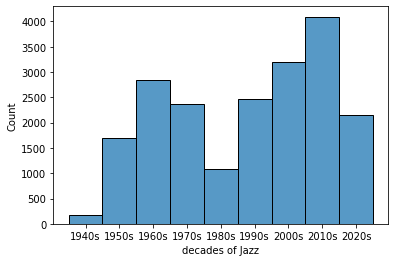

In [7]:
#to show the distribution of the decades for our data exploration
import collections

decades = []
dec_count = 0
for year in jazz_dataset['year_released']:
    decade = int(str(year)[:3])
    label = str(decade) + '0s'
    if decade >= 194:
        decades.append(label)

counter=collections.Counter(decades)
count = sorted(counter.items(), key=lambda i: i[0])

print('distribution count for each decade:')
for key in count:
    print(f'{key[0]}: {key[1]}')
    

decades = sorted(decades, key= lambda i: i[:3])

import seaborn as sns
x = pd.Series(decades, name="decades of Jazz")
ax = sns.histplot(x)


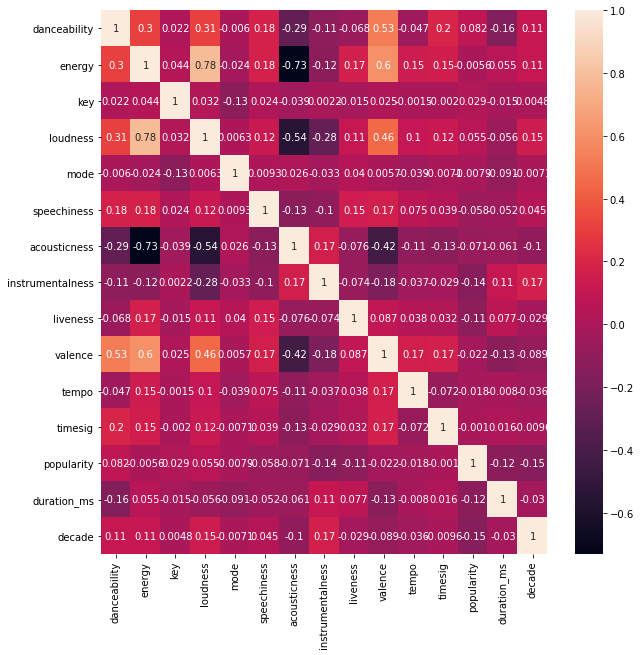

In [8]:
#to plot a correlation matrix
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(scaled_jazz_dataset_category.corr(), annot=True, ax=ax)
plt.show()

Logistic Regression

In [9]:
# importing the necessary packages
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    accuracy_score,
    multilabel_confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV



In [10]:
#prepping data for modeling
from sklearn.model_selection import train_test_split
#1. data prep

#prepping features

x = scaled_jazz_dataset_category.drop(['decade'], axis=1)


#prepping target
y = scaled_jazz_dataset_category['decade']


#shuffling the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle= True)


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Results:
--------------------------
Accuracy: 0.29459836555710583
Error: 0.7054016344428942
Precision: 0.28468344210206176
Recall: 0.29459836555710583
F1 Score: 0.2665953155533904
AUC: 0.6931634890905407

Training Results:
--------------------------
Accuracy: 0.28965379759452453
Error: 0.7103462024054754
Precision: 0.2750877269888316
Recall: 0.28965379759452453
F1 Score: 0.2599361409443504
AUC: 0.6922650734493706



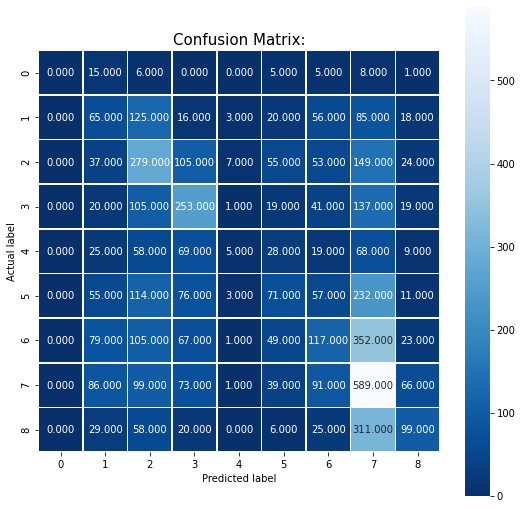

In [11]:
#to implement multi-class logistic regression w/o CV or Lasso 

log_model = LogisticRegressionCV(multi_class = 'multinomial', cv = 5, max_iter=1000)
log_model.fit(x_train, y_train)

#to make predictions for the testing set
y_test_pred = log_model.predict(x_test)

#to make predictions for the training set
y_train_pred = log_model.predict(x_train)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
test_precision = precision_score(y_test, y_test_pred, average= 'weighted')
test_recall = recall_score(y_test, y_test_pred, average= 'weighted')
test_F1_score = f1_score(y_test, y_test_pred, average = 'weighted')
test_auc = roc_auc_score(y_test, log_model.predict_proba(x_test), multi_class='ovr', average='weighted')


train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = (1 - train_accuracy)
train_precision = precision_score(y_train, y_train_pred, average= 'weighted')
train_recall = recall_score(y_train, y_train_pred, average= 'weighted')
train_F1_score = f1_score(y_train, y_train_pred, average = 'weighted')
train_auc = roc_auc_score(y_train, log_model.predict_proba(x_train), multi_class='ovr', average='weighted')


print(f"""Testing Results:
--------------------------
Accuracy: {test_accuracy}
Error: {test_error}
Precision: {test_precision}
Recall: {test_recall}
F1 Score: {test_F1_score}
AUC: {test_auc}
""")

print(f"""Training Results:
--------------------------
Accuracy: {train_accuracy}
Error: {train_error}
Precision: {train_precision}
Recall: {train_recall}
F1 Score: {train_F1_score}
AUC: {train_auc}
""")


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for Logistic Regression:'
plt.title(all_sample_title, size = 15);



k-nearest neighbors classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Testing Results:
--------------------------
Accuracy: 0.5008969503687463
Error: 0.49910304963125374
Precision: 0.49328118387405273
Recall: 0.5008969503687463
F1 Score: 0.49276138953303383
AUC: 0.8054785718164609

Training Results:
--------------------------
Accuracy: 0.6486809754800984
Error: 0.3513190245199016
Precision: 0.6467675637927492
Recall: 0.6486809754800984
F1 Score: 0.6431184531026164
AUC: 0.9533724286088875



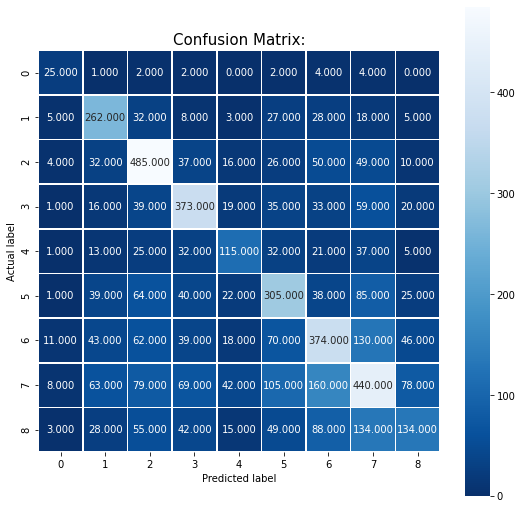

In [16]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)

knn_model.fit(x_train, y_train)

#to make predictions for the testing set
y_test_pred = knn_model.predict(x_test)

#to make predictions for the training set
y_train_pred = knn_model.predict(x_train)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
test_precision = precision_score(y_test, y_test_pred, average= 'weighted')
test_recall = recall_score(y_test, y_test_pred, average= 'weighted')
test_F1_score = f1_score(y_test, y_test_pred, average = 'weighted')
test_auc = roc_auc_score(y_test, knn_model.predict_proba(x_test), multi_class='ovo', average='weighted')


train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = (1 - train_accuracy)
train_precision = precision_score(y_train, y_train_pred, average= 'weighted')
train_recall = recall_score(y_train, y_train_pred, average= 'weighted')
train_F1_score = f1_score(y_train, y_train_pred, average = 'weighted')
train_auc = roc_auc_score(y_train, knn_model.predict_proba(x_train), multi_class='ovo', average='weighted')


print(f"""Testing Results:
--------------------------
Accuracy: {test_accuracy}
Error: {test_error}
Precision: {test_precision}
Recall: {test_recall}
F1 Score: {test_F1_score}
AUC: {test_auc}
""")

print(f"""Training Results:
--------------------------
Accuracy: {train_accuracy}
Error: {train_error}
Precision: {train_precision}
Recall: {train_recall}
F1 Score: {train_F1_score}
AUC: {train_auc}
""")


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix for KNN:'
plt.title(all_sample_title, size = 15);
